I will use visualizations in matplotlib and apply the following models to present Question 2:
1. Linear regression
2. Logistic regression
3. Ridge regression
4. Lasso regression

Variables explanation:
  1. lnchprg:    percentage of students in school lunch program.
  2. enroll:     school enrollment
  3. staff:      staff per 1000 students
  4. expend:     expend. per student, $
  
  5. salary:     avg. teacher salary, $
  
  6. benefits:   avg. teacher benefits, $
  7. droprate:   school dropout rate, perc
  8. gradrate:   school graduation rate, perc
  9. math10:     perc studs passing MEAP math
  
  10. sci11:      perc studs passing MEAP science
  11. totcomp:    salary + benefits
  12. ltotcomp:   log(totcomp)
  13. lexpend:    log of expend
  14. lenroll:    log(enroll)
  15. lstaff:     log(staff)
  16. bensal:     benefits/salary
  17. lsalary:    log(salary)

## Q : Visualizations in matplotlib

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
os.chdir('/Users/chiayiyen')
df2 = pd.read_csv('/Users/chiayiyen/Desktop/0MSBAUTD/2023/6341/csv/MEAP93.csv')
df2

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
0,1.4,1862,112.6,5765,37498,7420,2.9,89.2,56.4,67.9,44918,10.71259,8.659560,7.529407,4.723842,0.197877,10.53204
1,2.3,11355,101.2,6601,48722,10370,1.3,91.4,42.7,65.3,59092,10.98685,8.794976,9.337414,4.617099,0.212840,10.79389
2,2.7,7685,114.0,6834,44541,7313,3.5,91.4,43.8,54.3,51854,10.85619,8.829665,8.947025,4.736198,0.164186,10.70417
3,3.4,1148,85.4,3586,31566,5989,3.6,86.6,25.3,60.0,37555,10.53356,8.184793,7.045776,4.447346,0.189729,10.35984
4,3.4,1572,96.1,3847,29781,5545,0.0,100.0,15.3,65.8,35326,10.47237,8.255049,7.360104,4.565389,0.186193,10.30163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,60.9,1689,78.4,5380,41856,9468,35.8,23.5,7.0,11.2,51324,10.84591,8.590444,7.431892,4.361824,0.226204,10.64199
404,61.1,2631,100.7,5088,35020,7655,17.5,61.1,8.1,22.7,42675,10.66137,8.534640,7.875119,4.612146,0.218589,10.46367
405,73.8,4024,85.2,3942,32678,6220,8.7,83.3,11.5,26.8,38898,10.56870,8.279444,8.300032,4.445002,0.190342,10.39446
406,74.4,850,122.4,5029,29210,6513,1.6,91.9,9.5,9.7,35723,10.48355,8.522977,6.745236,4.807294,0.222972,10.28227


In [3]:
df2.describe()

,lnchprg,enroll,staff,expend,salary,benefits,droprate,gradrate,math10,sci11,totcomp,ltotcomp,lexpend,lenroll,lstaff,bensal,lsalary
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,25.201471,2663.806373,100.641667,4376.578431,31774.507353,6463.428922,5.066422,83.651716,24.106863,49.183088,38237.936275,10.539960,8.370177,7.509714,4.603369,0.204503,10.354385
std,13.610075,2696.820560,13.299518,775.789717,5038.303826,1456.337659,5.485072,13.368375,10.493613,12.524668,5985.086038,0.151267,0.161882,0.867304,0.126683,0.037533,0.154316
min,1.400000,212.000000,65.900000,3332.000000,19764.000000,0.000000,0.000000,23.500000,1.900000,7.200000,24498.000000,10.106350,8.111328,5.356586,4.188138,0.000000,9.891618
25%,14.625000,1037.500000,91.450000,3821.250000,28185.500000,5536.500000,1.900000,77.000000,16.625000,41.300000,34032.000000,10.435060,8.248333,6.944566,4.515792,0.187977,10.246560
50%,23.850000,1840.500000,99.000000,4145.000000,31266.000000,6304.500000,3.700000,86.300000,23.400000,49.100000,37443.500000,10.530585,8.329657,7.517791,4.595120,0.202401,10.350290
75%,33.825000,3084.750000,108.025000,4658.750000,34499.750000,7228.000000,6.500000,93.225000,30.050000,57.150000,41637.000000,10.636745,8.446503,8.034225,4.682362,0.220256,10.448710
max,79.500000,16793.000000,166.600000,7419.000000,52812.000000,11618.000000,61.900000,127.100000,66.700000,85.700000,63518.000000,11.059080,8.911799,9.728718,5.115596,0.449985,10.874490


### Heat Map

<AxesSubplot:>

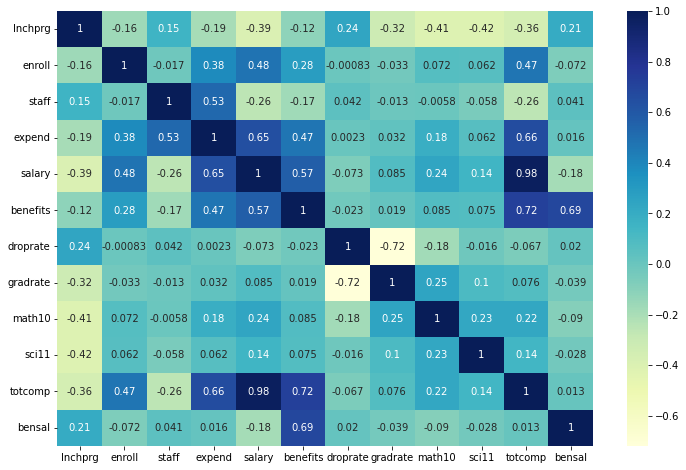

In [60]:
df22 = df2.copy()
df22 = df22.drop(['ltotcomp','lexpend','lenroll','lstaff','lsalary'], axis =1)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df22.corr(), annot = True, cmap = "YlGnBu", ax=ax)

# The heatmap illustrates the presence of both POSITIVE and NEGATIVE correlations among all variables. 
# (1)The dark blue blocks shows POSITIVELY correlated variables:
#    lnchprg : droprate(0.24)
#    enroll  : salary(0.48)
#    staff   : expend(0.57)
#    expend  : totcomp(0.66), salary(0.65)
#    salary  : totcomp(0.98), expend(0.65)
#    benefits: totcomp(0.72), bensal(0.69)
#    droprate: lnchprg(0.24)
#    graduate: math10(0.25)
#    math10  : graduate(0.25)
#    sci11   : math10(0.23)
#    totcomp : salary(0.98), benefits(0.72)
#    bensal  : benefits(0.69)

# (2)The light yellow areas shows NEGATIVELY correlated variables:
#    lnchprg : sci11(-0.42)
#    staff   : salary(-0.26), totcomp(-0.26)
#    salary  : lnchprg(-0.39)
#    droprate: graduate(-0.72)
#    math10  : lnchprg(-0.41)
#    sci11   : lnchprg(-0.42)
#    totcomp : lnchprg(-0.36)

### Scatter Plot

<AxesSubplot:xlabel='math10', ylabel='sci11'>

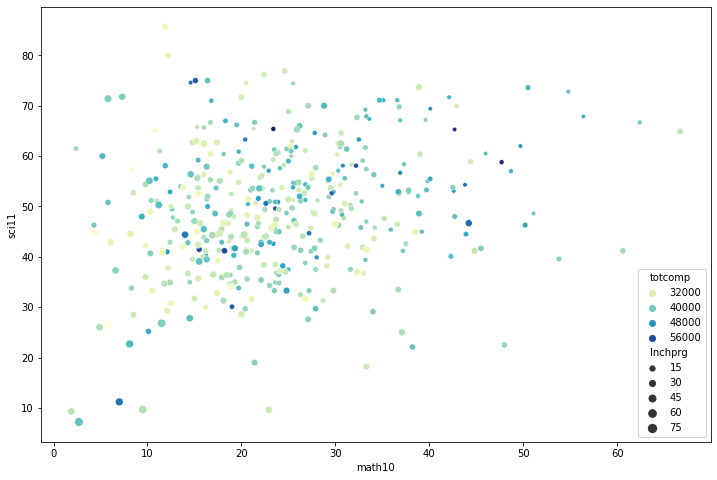

In [57]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x = "math10", y = "sci11", data = df2, hue = "totcomp", size = "lnchprg", palette = "YlGnBu")

# (1) From the upper right part of the figure, we can see that those schools with higher percentage of students 
#     passing MEAP math and science have fewer percentage of students in school lunch program (smaller dots, "lnchprg") 
#     and better salary + benefits(darker blue dots, "totcomp").
# (2) On the other hand, the lower left-hand corner of the image shows those schools with lower "math10" and "sci11",
#     they tend to have bigger dots (higher "lnchprg") 

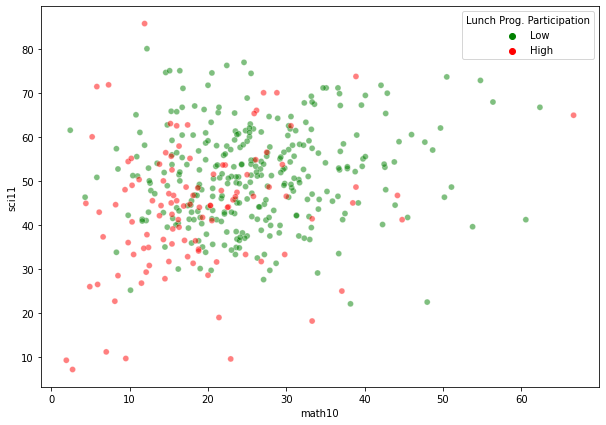

In [61]:
# The variable 'lnchprg' has a 75th percentile value of 33.8.
df22['Lunch Prog. Participation'] = df22['lnchprg'].apply(lambda x: 'High' if x > 33 else 'Low')

plt.figure(figsize=(10, 7))
sns.scatterplot(x='math10', y='sci11', hue='Lunch Prog. Participation', palette=['green', 'red'], data=df22, alpha=0.5)
plt.legend(title='Lunch Prog. Participation')

# We can see that high 'lnchprg'(red dots) is concentrated at the lower left-hand corner of the image, which 
# represents lower % of students passing math and science exam. 

### BoxPlot

Text(0, 0.5, 'passing MEAP math(%)')

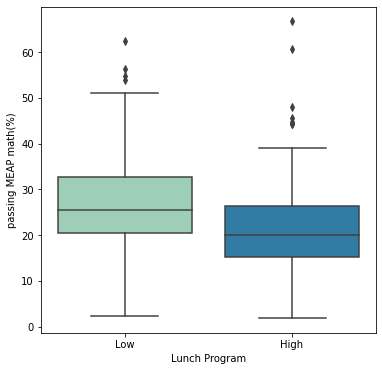

In [61]:
# 49 is the median of "sci11".
df22['Science'] = df22['sci11'].apply(lambda x: 'High' if x > 49 else 'Low')

# 86 is the median of "gradrate".
df22['Graduation'] = df22['gradrate'].apply(lambda x: '>86' if x > 86 else '<86')

# 23 is the median of "lnchprg".
df22['Lunch Program'] = df22['lnchprg'].apply(lambda x: 'High' if x > 23 else 'Low')

fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x="Lunch Program", y="math10", data=df22, palette="YlGnBu", ax=ax)
ax.set_ylabel("passing MEAP math(%)")

# Schools with high percentage of students in school lunch program("lnchprg") 
# will have lower perc studs passing MEAP math("math10").

Text(0, 0.5, 'passing MEAP science(%)')

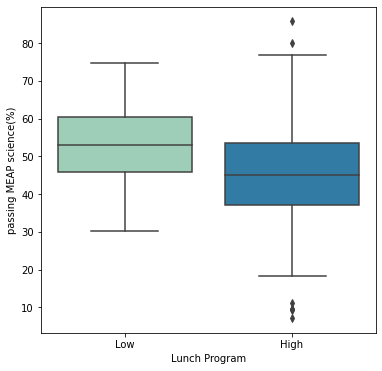

In [62]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(x = "Lunch Program", y = "sci11", data = df22, palette = "YlGnBu")
ax.set_ylabel("passing MEAP science(%)")

# Schools with high percentage of students in school lunch program("lnchprg") 
# tend to have lower perc studs passing MEAP science("sci11").

### PairPlot

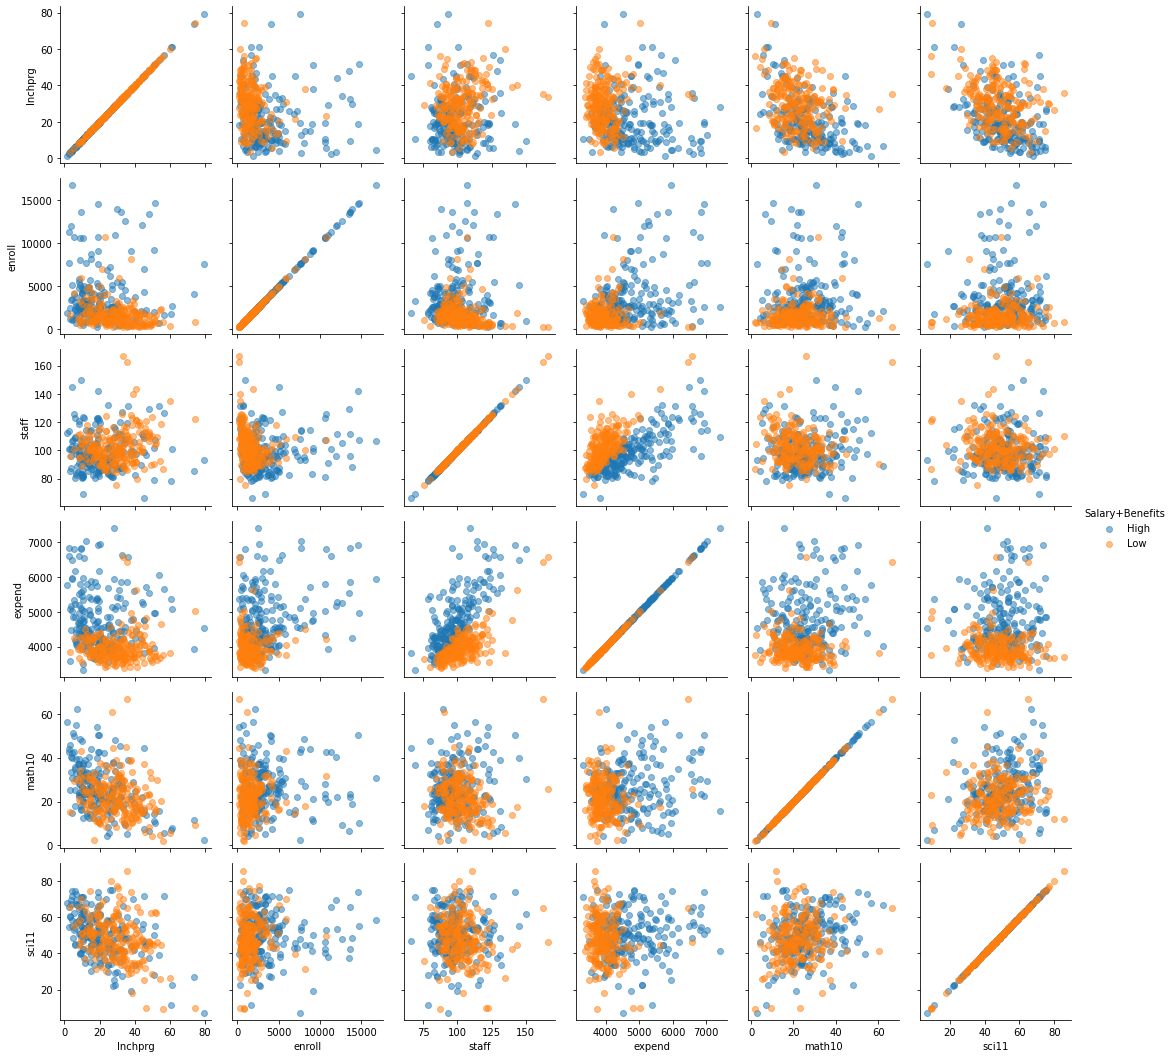

In [16]:
# 37443 is the median of "totcomp".
df22['Salary+Benefits'] = df22['totcomp'].apply(lambda x: 'High' if x > 37443 else 'Low')

g = sns.PairGrid(df22, vars=['lnchprg', 'enroll', 'staff', 'expend', 'math10', 'sci11'], 
                 hue='Salary+Benefits')
g.map(plt.scatter, alpha=0.5) 
g.add_legend()

# Orange dots stands for those schools with lower total compensation("totcomp"):
# (1) From the "enroll" variable, we can see that schools with lower enrollment typically offer lower levels of compensation.
# (2) From the "expend" variable, we can see that schools with lower expenditure per student generally provide lower levels of compensation."

### 3D Plot

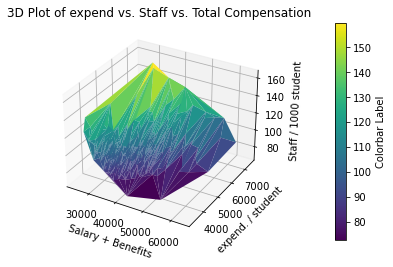

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# Use the plot_trisurf function to plot a surface in 3D
surf = ax.plot_trisurf(df2['totcomp'], df2['expend'], df2['staff'],
                       cmap='viridis', edgecolor='none')
# Add labels and a title
ax.set_xlabel('Salary + Benefits')
ax.set_ylabel('expend. / student')
ax.set_zlabel('Staff / 1000 student')
ax.set_title('3D Plot of expend vs. Staff vs. Total Compensation')

# Add a colorbar and adjust its position
cb = fig.colorbar(surf, pad=0.2)
cb.ax.yaxis.set_label_position('right')
cb.set_label('Colorbar Label')

plt.show()

# The 3D plot suggests that increasing "staff" (staff per 1000 students) and "expend" (expenditure per student) values
# result in a decrease in "totcomp" (salary + benefits).

## Q : Models in statsmodels

## Regression - math10

In [63]:
df2lr = df2.copy()
df2lr = df2lr.drop(['lstaff','salary','enroll','expend','ltotcomp'], axis =1)

y = df2lr['math10']
X = df2lr.copy()
X = X.drop(['math10'], axis =1)
X['const'] = 1.0

In [64]:
linregr1 = sm.OLS(y, X).fit()
print(linregr1.summary())

# In this regression, we get a R-square = 0.238 and Adj. R-square = 0.216. 
# The variables that were statistically significant at the 0.05 level were:
# lnchprg, staff, lexpend, lenroll, bensal, lsalary 

                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           3.41e-18
Time:                        18:12:11   Log-Likelihood:                -1482.2
No. Observations:                 408   AIC:                             2988.
Df Residuals:                     396   BIC:                             3037.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnchprg       -0.2425      0.043     -5.597      0.0

In [65]:
linregr1.predict()

array([34.12673168, 29.65419397, 32.31000686, 31.71451207, 31.18582703,
       31.73750324, 32.42623529, 30.17031966, 32.65710654, 34.50287278,
       28.69291752, 32.99321374, 33.06881301, 24.96101871, 44.14824698,
       31.2509662 , 34.29459428, 30.44083342, 30.08994421, 30.87347131,
       30.1029945 , 29.62680624, 30.43023545, 35.35059045, 30.47580424,
       26.67683845, 31.22238739, 28.33330782, 26.96263725, 27.57228929,
       31.07337459, 29.59179433, 31.18768265, 31.99313658, 28.78846662,
       29.49373003, 29.03809557, 31.28729125, 27.54741826, 26.61309785,
       25.32982813, 28.05343985, 25.74599397, 26.3339593 , 31.67311803,
       37.46956492, 28.08184409, 29.6101866 , 30.46301606, 34.55674596,
       25.03965375, 25.72749109, 28.59969685, 27.19260887, 31.50122507,
       28.9182118 , 30.73190596, 28.52623088, 32.12003849, 33.75121378,
       27.68030113, 29.25319393, 28.02945326, 28.742485  , 29.64445068,
       30.75175923, 28.94744663, 28.43772956, 30.68176278, 30.91

## Regression - sci11

In [66]:
y = df2lr['sci11']
X = df2lr.copy()
X = X.drop(['sci11'], axis =1)
X['const'] = 1.0

In [67]:
linregr1 = sm.OLS(y, X).fit()
print(linregr1.summary())

# In this regression, we get a R-square = 0.202 and Adj. R-square = 0.180. 
# The variables that were statistically significant at the 0.05 level were:
# lnchprg, droprate

                            OLS Regression Results                            
Dep. Variable:                  sci11   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     9.127
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.35e-14
Time:                        18:15:40   Log-Likelihood:                -1563.6
No. Observations:                 408   AIC:                             3151.
Df Residuals:                     396   BIC:                             3199.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lnchprg       -0.3971      0.051     -7.756      0.0

## Logistic regression - math10

In [70]:
dflr = df2.copy()

In [71]:
# The variable "math10" has a median of 23.4.
dflr['math10_binary'] = dflr['math10'].apply(lambda x: 1 if x > 23.4 else 0)

# Address the collinearity issue by removing "totcomp"(salary+benefits).
mod = smf.logit('math10_binary~lnchprg+enroll+staff+expend+salary+benefits+droprate+gradrate+bensal+sci11',data=dflr)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.610564
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          math10_binary   No. Observations:                  408
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                           10
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.1191
Time:                        18:17:08   Log-Likelihood:                -249.11
converged:                       True   LL-Null:                       -282.78
Covariance Type:            nonrobust   LLR p-value:                 1.437e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3750      4.770      0.079      0.937      -8.974       9.724
lnchprg       -0.0533      0.

## Logistic regression - sci11

In [66]:
# 49.1 is the median of "sci11".
dflr['sci11_binary'] = dflr['sci11'].apply(lambda x: 1 if x > 49.1 else 0)

# Address the collinearity issue by removing "totcomp"(salary+benefits).
mod = smf.logit('sci11_binary~lnchprg+enroll+staff+expend+salary+benefits+droprate+gradrate+bensal+math10',data=dflr)
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 0.601755
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           sci11_binary   No. Observations:                  408
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                           10
Date:                Thu, 09 Mar 2023   Pseudo R-squ.:                  0.1319
Time:                        19:28:21   Log-Likelihood:                -245.52
converged:                       True   LL-Null:                       -282.80
Covariance Type:            nonrobust   LLR p-value:                 5.753e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8701      5.209     -0.551      0.582     -13.079       7.339
lnchprg       -0.0722      0.

## Q : Models in sklearn

## Ridge Regression

In [72]:
X = df2[["lnchprg", "enroll", "staff", "expend", "salary", "benefits", "droprate", "gradrate", "totcomp", "bensal"]] # select the independent variables
# dependent variables: math10, sci11
y = df2[["math10", "sci11"]] 

clf = Ridge(alpha=1.0)
clf.fit(X, y)

Ridge()

In [73]:
clf.coef_

array([[-2.59965184e-01, -1.66229698e-04,  4.80023765e-02,
         3.47148018e-04,  2.52172419e-04, -2.28928569e-04,
        -7.57573821e-03,  9.79776237e-02,  2.32440920e-05,
         2.21880715e+00],
       [-4.09113365e-01,  1.37355513e-05,  1.46439306e-01,
        -3.43977398e-03, -9.05808077e-05,  4.27407818e-04,
         2.99133065e-01,  5.00889055e-02,  3.36824747e-04,
         2.10515562e+00]])

In [74]:
clf.intercept_

array([ 8.71764803, 40.87339262])

In [75]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [76]:
lm.coef_

array([[-2.65197093e-01, -1.69500417e-04,  4.13482463e-02,
         3.77120158e-04,  1.50451450e-03, -2.18728474e-03,
         2.37484971e-03,  9.67629509e-02, -6.82769645e-04,
         9.09888708e+01],
       [-4.14080382e-01,  1.06311952e-05,  1.40151133e-01,
        -3.41189120e-03,  1.09765605e-03, -1.43065366e-03,
         3.08625559e-01,  4.89493018e-02, -3.32997042e-04,
         8.63297232e+01]])

In [77]:
lm.intercept_

array([-8.84415929, 24.20714675])

In [78]:
clf.predict(X)

array([[33.40862825, 57.64121776],
       [34.0850074 , 57.53975836],
       [34.63903988, 55.58852211],
       [29.32772645, 57.8329762 ],
       [30.79350645, 57.31592131],
       [32.029602  , 56.06203092],
       [31.69700645, 57.07573232],
       [30.60982577, 57.50861841],
       [31.8254598 , 57.16141556],
       [33.18851762, 57.62445148],
       [30.49608609, 57.00966861],
       [32.38960428, 56.9583095 ],
       [32.13399579, 56.16258982],
       [28.18695564, 56.17663399],
       [35.96536863, 51.63908309],
       [32.67487486, 54.45940731],
       [33.37159728, 55.26654972],
       [30.90811845, 55.89174736],
       [30.47487126, 55.80216384],
       [30.14192166, 62.17806643],
       [29.93414739, 55.55537161],
       [28.92865139, 56.76641675],
       [30.49862775, 55.34153458],
       [31.30865779, 56.31913226],
       [29.06546595, 56.09985747],
       [28.29808567, 56.3646978 ],
       [30.26995726, 56.08763932],
       [29.09710307, 55.1071119 ],
       [27.82568765,

In [79]:
clf.predict(X).mean()

36.644975490196074

In [80]:
lm.predict(X).mean()

36.644975490196074

In [81]:
clf.predict(X).var()

182.81275195598909

In [82]:
lm.predict(X).var()

183.2952329738918

In [83]:
clf = linear_model.RidgeCV(alphas=np.linspace(0.1,500,1000),store_cv_values=True,cv=None)
clf.fit(X,y)

RidgeCV(alphas=array([1.00000000e-01, 6.00400400e-01, 1.10080080e+00, 1.60120120e+00,
       2.10160160e+00, 2.60200200e+00, 3.10240240e+00, 3.60280280e+00,
       4.10320320e+00, 4.60360360e+00, 5.10400400e+00, 5.60440440e+00,
       6.10480480e+00, 6.60520521e+00, 7.10560561e+00, 7.60600601e+00,
       8.10640641e+00, 8.60680681e+00, 9.10720721e+00, 9.60760761e+00,
       1.01080080e+01, 1.06084084e+0...
       4.88490791e+02, 4.88991191e+02, 4.89491592e+02, 4.89991992e+02,
       4.90492392e+02, 4.90992793e+02, 4.91493193e+02, 4.91993594e+02,
       4.92493994e+02, 4.92994394e+02, 4.93494795e+02, 4.93995195e+02,
       4.94495596e+02, 4.94995996e+02, 4.95496396e+02, 4.95996797e+02,
       4.96497197e+02, 4.96997598e+02, 4.97497998e+02, 4.97998398e+02,
       4.98498799e+02, 4.98999199e+02, 4.99499600e+02, 5.00000000e+02]),
        store_cv_values=True)

In [84]:
clf.coef_

array([[-2.57824209e-01, -1.65885835e-04,  4.39168734e-02,
         4.34296823e-04,  2.19499915e-04, -1.85006408e-04,
        -9.72607500e-03,  9.74813765e-02,  3.44935074e-05,
         4.53885575e-03],
       [-4.05573675e-01,  1.45633867e-05,  1.31310556e-01,
        -3.10972404e-03, -1.31273806e-04,  4.61155416e-04,
         2.73644601e-01,  4.38462752e-02,  3.29881610e-04,
         4.27135396e-03]])

In [85]:
clf.intercept_

array([ 9.52187564, 43.28141988])

In [86]:
clf.alpha_

500.0

In [87]:
lm.coef_

array([[-2.65197093e-01, -1.69500417e-04,  4.13482463e-02,
         3.77120158e-04,  1.50451450e-03, -2.18728474e-03,
         2.37484971e-03,  9.67629509e-02, -6.82769645e-04,
         9.09888708e+01],
       [-4.14080382e-01,  1.06311952e-05,  1.40151133e-01,
        -3.41189120e-03,  1.09765605e-03, -1.43065366e-03,
         3.08625559e-01,  4.89493018e-02, -3.32997042e-04,
         8.63297232e+01]])

In [88]:
lm.intercept_

array([-8.84415929, 24.20714675])

In [89]:
clf.predict(X)

array([[33.37627438, 57.62113577],
       [34.06879593, 57.51912763],
       [34.61434764, 55.61289084],
       [29.28659488, 57.77143234],
       [30.75421903, 57.26766124],
       [32.00284691, 56.0707574 ],
       [31.65781606, 57.01876134],
       [30.57454095, 57.4595511 ],
       [31.78523435, 57.09848369],
       [33.1298311 , 57.52086735],
       [30.47949312, 57.00120321],
       [32.37707351, 56.94979922],
       [32.09631149, 56.11435547],
       [28.17190707, 56.20086147],
       [35.77383768, 51.4392997 ],
       [32.66528206, 54.54560661],
       [33.33107099, 55.22615609],
       [30.88057153, 55.87313774],
       [30.45190362, 55.79283025],
       [30.07218243, 61.65656521],
       [29.91476037, 55.56378684],
       [28.89263966, 56.72895927],
       [30.47810425, 55.34417104],
       [31.26498206, 56.23861275],
       [29.03505088, 56.06821777],
       [28.24790003, 56.29445388],
       [30.22730758, 55.98849979],
       [29.07128451, 55.08824918],
       [27.80577477,

In [90]:
clf.predict(X).mean()

36.644975490196074

In [91]:
lm.predict(X).mean()

36.644975490196074

In [92]:
clf.predict(X).var()

182.39396523973096

In [93]:
lm.predict(X).var()

183.2952329738918

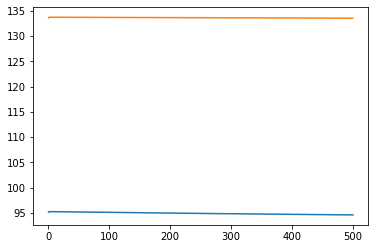

In [94]:
plt.plot(np.linspace(0.1,500,1000),clf.cv_values_.mean(0).T)
# transpose the y array

## Lasso Regression

In [95]:
X = df2[["lnchprg", "enroll", "staff", "expend", "salary", "benefits", "droprate", "gradrate", "totcomp", "bensal"]] # select the independent variables
# dependent variables: math10, sci11
y = df2[["math10", "sci11"]] 

clf = Lasso(alpha=0.1)
clf.fit(X, y) 

/Users/chiayiyen/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+03, tolerance: 6.384e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [96]:
clf.coef_

array([[-2.59391615e-01, -1.64871953e-04,  4.03456360e-02,
         5.09416736e-04,  2.43016797e-04, -1.55278538e-04,
        -3.40468009e-03,  9.91290709e-02, -0.00000000e+00,
         0.00000000e+00],
       [-4.08530443e-01,  1.43792917e-05,  1.37449968e-01,
        -3.24259183e-03,  2.96294663e-04,  8.93219033e-04,
         2.89423236e-01,  4.71892239e-02, -8.55438239e-05,
         0.00000000e+00]])

In [97]:
clf.intercept_

array([ 9.79997098, 42.46796104])

In [98]:
lm = linear_model.LinearRegression()
lm.fit(X,y)

LinearRegression()

In [99]:
lm.coef_

array([[-2.65197093e-01, -1.69500417e-04,  4.13482463e-02,
         3.77120158e-04,  1.50451450e-03, -2.18728474e-03,
         2.37484971e-03,  9.67629509e-02, -6.82769645e-04,
         9.09888708e+01],
       [-4.14080382e-01,  1.06311952e-05,  1.40151133e-01,
        -3.41189120e-03,  1.09765605e-03, -1.43065366e-03,
         3.08625559e-01,  4.89493018e-02, -3.32997042e-04,
         8.63297232e+01]])

In [100]:
lm.intercept_

array([-8.84415929, 24.20714675])

In [101]:
lm.predict(X)

array([[33.45961554, 57.68956545],
       [33.78292216, 57.25315349],
       [35.83229318, 56.72056492],
       [29.34501357, 57.84942204],
       [30.58773602, 57.12070816],
       [32.45826772, 56.46866661],
       [32.02268725, 57.38477842],
       [30.69160414, 57.58624149],
       [31.85407592, 57.18861865],
       [32.92186242, 57.37155334],
       [30.26260865, 56.78812713],
       [32.1724624 , 56.75227389],
       [32.1290912 , 56.15796213],
       [27.93713052, 55.93950726],
       [43.65233111, 58.93247918],
       [32.96106221, 54.73072655],
       [33.90257412, 55.77034031],
       [31.00479285, 55.98344997],
       [30.76194489, 56.07450796],
       [30.29900707, 62.32810035],
       [30.14778602, 55.75800861],
       [28.9769539 , 56.81224606],
       [30.68737902, 55.52057012],
       [31.28467358, 56.29646234],
       [29.11573373, 56.14755332],
       [28.21725074, 56.28804654],
       [30.83874549, 56.62743107],
       [29.05356718, 55.06579007],
       [26.91305524,

In [102]:
lm.predict(X).mean()

36.644975490196074

In [103]:
clf = linear_model.MultiTaskLassoCV()
clf.fit(X,y)

MultiTaskLassoCV()

In [104]:
clf.coef_

array([[-2.22389955e-01, -1.98246761e-04,  0.00000000e+00,
         1.22290714e-03,  2.34847193e-04, -3.01448340e-04,
        -0.00000000e+00,  1.41611734e-02,  0.00000000e+00,
         0.00000000e+00],
       [-3.06681546e-01,  2.06749696e-05,  0.00000000e+00,
        -3.27315933e-04, -1.06909903e-05,  3.86148925e-04,
         0.00000000e+00, -5.07212617e-04,  0.00000000e+00,
         0.00000000e+00]])

In [105]:
clf.intercept_

array([18.18898825, 56.17564797])

In [106]:
clf.mse_path_

array([[180.93464622,  91.5375347 ,  99.64006036, 135.75198971,
        217.61167575],
       [180.93464622,  91.45726993,  99.57424794, 135.98859122,
        217.61167575],
       [180.93464622,  91.40552005,  99.52903781, 136.23816963,
        217.61167575],
       [180.93464622,  91.37735374,  99.50093569, 136.49608307,
        217.61167575],
       [180.93464622,  91.36856406,  99.48695711, 136.75849324,
        216.62246472],
       [180.93464622,  91.37556852,  99.48455727, 137.02224726,
        215.69321478],
       [180.93464622,  91.39532261,  99.49157038, 137.28477598,
        214.85131122],
       [180.93464622,  91.42524489,  99.50615706, 137.54400621,
        214.08764763],
       [180.93464622,  91.46315225,  99.52675883, 137.85012855,
        213.3941507 ],
       [180.93464622,  91.50720378,  99.55205879, 138.26109056,
        212.76365596],
       [180.93464622,  91.55585233,  99.5809475 , 138.6697285 ,
        212.18979903],
       [180.93464622,  91.6078026 ,  99.610

In [107]:
clf.mse_path_.mean(1)

array([145.09518135, 145.11328621, 145.14380989, 145.18413889,
       145.03422507, 144.90204681, 144.79152528, 144.6995404 ,
       144.63376731, 144.60373106, 144.58619472, 144.57846277,
       144.57681314, 144.56549869, 144.5521563 , 144.52844206,
       144.49433623, 144.45023916, 144.26758572, 144.10375318,
       143.95790088, 143.830524  , 143.7152349 , 143.61382902,
       143.52243153, 143.43946007, 143.36405157, 143.2954396 ,
       143.23294282, 143.17595487, 143.12464428, 143.10419226,
       143.08688703, 143.07228038, 143.05998572, 143.05940512,
       143.06724686, 143.07705256, 143.08899039, 143.12543015,
       143.16349212, 143.20121382, 143.27778644, 143.40627756,
       143.53089027, 143.65124751, 143.76532581, 143.87427788,
       143.9781247 , 144.07695   , 144.20410727, 144.32622358,
       144.4417306 , 144.55285723, 144.65754339, 144.75396656,
       144.84489091, 144.93119264, 145.0126941 , 145.08956403,
       145.16200891, 145.23023373, 145.29239523, 145.34

In [108]:
clf.mse_path_.mean(1).argmin()

99

In [109]:
clf.alpha_

17.293103966462034

In [110]:
clf.alphas_[clf.mse_path_.mean(1).argmin()]

17.293103966462034

In [111]:
clf.predict(X)

array([[32.39129652, 56.31690515],
       [33.1093463 , 56.98155091],
       [33.97252476, 55.57097831],
       [28.42479012, 55.91416014],
       [28.5643128 , 55.67833352],
       [31.26692793, 55.36270907],
       [30.34246239, 55.90113723],
       [29.55303499, 56.27913894],
       [30.38432718, 55.68318839],
       [31.12815289, 55.31282231],
       [29.32645636, 56.09796213],
       [32.68848273, 55.94172458],
       [30.360921  , 54.91658035],
       [27.85283802, 54.86880664],
       [35.21704452, 52.27141275],
       [31.6801301 , 54.797563  ],
       [32.350365  , 54.39975486],
       [30.37351678, 54.74454523],
       [29.4757923 , 55.19984614],
       [29.10349889, 54.82078956],
       [28.80233211, 55.0285752 ],
       [28.4379983 , 55.00559183],
       [29.03394448, 54.87378585],
       [29.31902204, 54.88474675],
       [28.29275725, 54.84840723],
       [26.73413823, 54.22211907],
       [30.27217135, 54.76929641],
       [27.99140215, 54.15760045],
       [28.13776051,

In [112]:
clf.predict(X).mean()

36.644975490196074

In [113]:
lm.predict(X).mean()

36.644975490196074

In [114]:
clf.predict(X).var()

173.5536465362774

In [117]:
lm.predict(X).var()

183.2952329738918

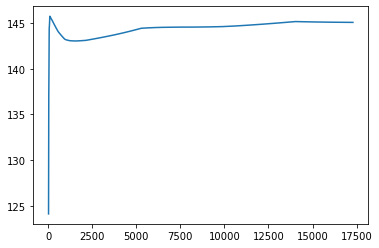

In [118]:
plt.plot(clf.alphas_,clf.mse_path_.mean(1))